In [ ]:
# Assignment 2  Q1

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

No handles with labels found to put in legend.


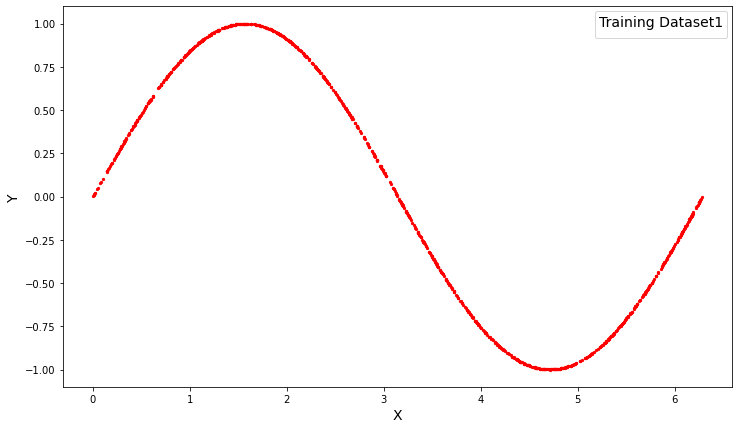

In [ ]:
# import data
data1n = pd.read_csv('drive/My Drive/PRML/IITM/Question1/Train_Dataset1.csv', header=None)
dt = np.array(data1n)

x = dt[:, 0].reshape(dt.shape[0], 1)
y = dt[:, 1].reshape(dt.shape[0], 1)

#print(x.shape)
#print(y.shape)

#print(x)
#print(y)

# Plotting the data points
plt.figure(figsize=(12,7))
plt.scatter(x, y,s=5,c='red')
plt.legend(title = 'Training Dataset1', title_fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('Y',fontsize=14)
plt.show()

No handles with labels found to put in legend.


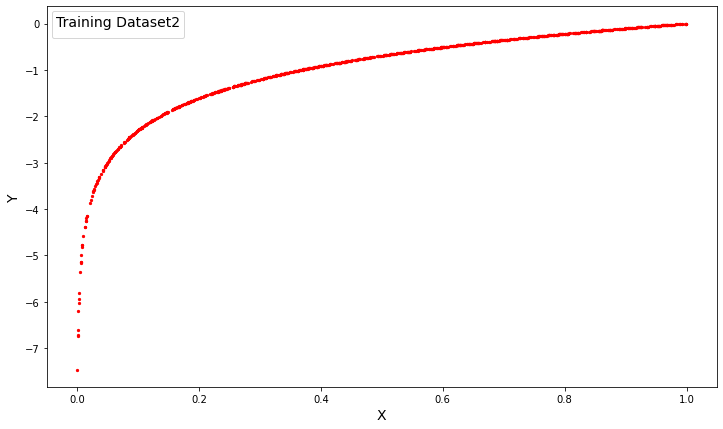

In [ ]:
#import data
data2n = pd.read_csv('drive/My Drive/PRML/IITM/Question1/Train_Dataset2.csv', header=None)
dt = np.array(data2n)

x = dt[:, 0].reshape(dt.shape[0], 1)
y = dt[:, 1].reshape(dt.shape[0], 1)

#print(x.shape)
#print(y.shape)

#print(x)
#print(y)

plt.figure(figsize=(12,7))
plt.scatter(x, y,s=5,c='red')
plt.legend(title = 'Training Dataset2', title_fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('Y',fontsize=14)
plt.show()

In [ ]:
#il = no. of nodes in input layer
#hl = no. of nodes in hidden layer
#ol = no. of nodes in output layer

il = 1
hl = 10
ol = 1

# initialization of parametrs
def init_params():
    np.random.seed(10)
    W1 = np.random.rand(hl, il)
    b1 = np.random.rand(hl, 1)
    W2 = np.random.rand(ol, hl)
    b2 = np.random.rand(ol, 1)
    return W1, b1, W2, b2

# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# derivative of sigmoid
def sigmoid_deriv(x):
    e = np.exp(-x)
    return e/(1+e)**2

# forward propogation (matrix version)
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = Z2
    return Z1, A1, Z2, A2

# backward propogation (matrix version)
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    
    dZ2 = A2 - Y

    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)

    dZ1 = W2.T.dot(dZ2) * sigmoid_deriv(Z1)

    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

# Updating Parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

# gradient descent method to update weights and biases
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    return W1, b1, W2, b2

# least squared error function
def least_squared_error(A2 , Y):
    lse = np.mean((A2 - Y)**2)
    return lse

In [ ]:
# processing Train data1
dt1n = np.array(data1n)
m, n = dt1n.shape
#print('data shape : ',dt1n.shape)

data_train = dt1n.T
#print('data^T shape : ',data_train.shape)

X_train = data_train[0:n-1]
Y1_train = data_train[n-1]

Y_train = Y1_train.reshape(1,1000)

#print('X shape : ',X_train.shape)
#print('Y shape : ',Y_train.shape)
n_train,m_train = X_train.shape
#print('m : ',m)
#print('m_train : ',m_train)

In [ ]:
# model learning with alpha and no. of iterations
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.34 ,500000)

_, _, _, A2 = forward_prop(W1, b1, W2, b2, X_train)
Y = Y_train.reshape(1,m)

#plt.scatter(X_train, A2,s=5,c='red')
#print('Least Squared Error : ',least_squared_error(A2 , Y))

Hidden Layer nodes : 10
Alpha (Learning Rate) : 0.34


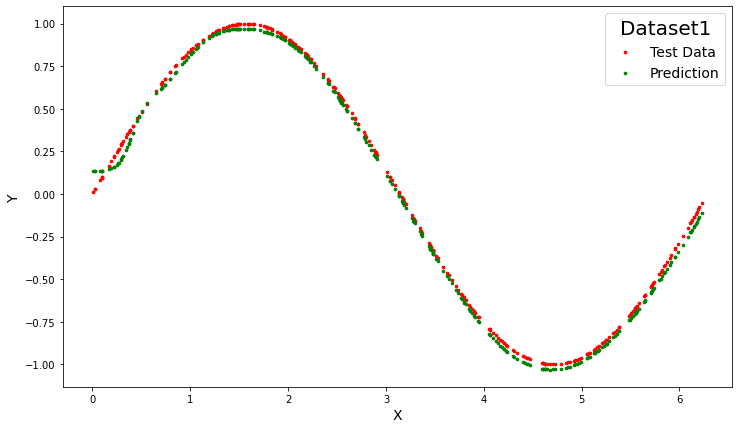

Least Squared Error (Train Dataset1) :  0.001114058437882423
Least Squared Error (Test Dataset1)  :  0.0011781160016871043


In [ ]:
# import test data1
data1t = pd.read_csv('drive/My Drive/PRML/IITM/Question1/Test_Dataset1.csv', header=None)

dt1t = np.array(data1t)
m1, n1 = dt1t.shape
#print('data1 shape : ',data1.shape)

data_test = dt1t.T
#print('data1^T shape : ',data_test.shape)

X_test = data_test[0:n1-1]
Y_test = data_test[n1-1]

# making prediction from trained NN
_, _, _, A2_test = forward_prop(W1, b1, W2, b2, X_test)

print('Hidden Layer nodes : 10')
print('Alpha (Learning Rate) : 0.34')

#Plotting the test data and prediction
plt.figure(figsize=(12,7))

plt.scatter(X_test, Y_test, label='Test Data', s=7, color='red')
plt.scatter(X_test, A2_test, label='Prediction', s=7, color='green')

plt.legend(title = 'Dataset1', fontsize=14, title_fontsize=20)
plt.xlabel('X',fontsize=14)
plt.ylabel('Y',fontsize=14)
plt.show()

# printing Least Squared Error
print('Least Squared Error (Train Dataset1) : ',least_squared_error(A2 , Y))
print('Least Squared Error (Test Dataset1)  : ',least_squared_error(A2_test , Y_test))

In [ ]:
#Q1 (c)

#importing datasets2
dt = pd.read_csv('drive/My Drive/PRML/IITM/Question1/Train_Dataset2.csv', header=None)
dp = pd.read_csv('drive/My Drive/PRML/IITM/Question1/Test_Dataset2.csv', header=None)

data = np.array(dt)
m, n = data.shape
#print('data shape : ',data.shape)

data_train = data.T
#print('data^T shape : ',data_train.shape)

X_train = data_train[0:n-1]
Y_train = data_train[n-1]

data1 = np.array(dp)
m1, n1 = data1.shape
#print('data1 shape : ',data1.shape)

data_test = data1.T
#print('data1^T shape : ',data_test.shape)

X_test = data_test[0:n1-1]
Y_test = data_test[n1-1]

#print('X_train shape : ',X_train.shape)
#print('Y_train shape : ',Y_train.shape)
#print('X_test shape : ',X_test.shape)
#print('Y_test shape : ',Y_test.shape)
n_train,m_train = X_train.shape
#print('m : ',m)
#print('m_train : ',m_train)

In [ ]:
# model learning with alpha and no. of iterations
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.31 ,800000)

_, _, _, A2 = forward_prop(W1, b1, W2, b2, X_train)
Y = Y_train.reshape(1,m)

#plt.scatter(X_train, A2,s=5,c='red')
#print('Least Squared Error : ',least_squared_error(A2 , Y))

Hidden Layer nodes : 10
Alpha (Learning Rate) : 0.31


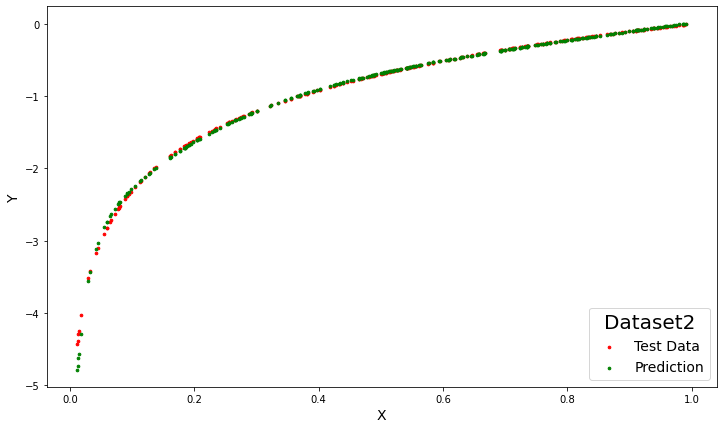

Least Squared Error (Train Dataset2) :  0.005116318522563475
Least Squared Error (Test Dataset2)  :  0.0020804519042311666


In [ ]:
data1 = np.array(dp)
m1, n1 = data1.shape
#print('data1 shape : ',data1.shape)

data_test = data1.T
#print('data1^T shape : ',data_test.shape)

X_test = data_test[0:n1-1]
Y_test = data_test[n1-1]

# making prediction from trained NN
_, _, _, A2_test = forward_prop(W1, b1, W2, b2, X_test)

print('Hidden Layer nodes : 10')
print('Alpha (Learning Rate) : 0.31')

#Plotting the test data and prediction
plt.figure(figsize=(12,7))

plt.scatter(X_test, Y_test, label='Test Data', s=7, color='red')
plt.scatter(X_test, A2_test, label='Prediction', s=7, color='green')

plt.legend(title = 'Dataset2', fontsize=14, title_fontsize=20, loc=4)
plt.xlabel('X',fontsize=14)
plt.ylabel('Y',fontsize=14)
plt.show()

# printing Least Squared Error
print('Least Squared Error (Train Dataset2) : ',least_squared_error(A2 , Y))
print('Least Squared Error (Test Dataset2)  : ',least_squared_error(A2_test , Y_test))